In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df_type = pd.read_csv("simple.gene_type",header=None,sep="\t")
df_type.columns = ["ID","type"]
df_type.head()

,ID,type
0,1HG0013700,1
1,1HG0014420,1
2,1HG0016740,1
3,1HG0020410,1
4,1HG0041620,1


In [159]:
df_grr = pd.read_csv("MOREX_gene_GRR.txt",header=None,sep=" ")
df_grr.columns = ["ID","GRR"]
df_grr.head()

,ID,GRR
0,HORVU_MOREXr2_7HG0620900.1,20
1,HORVU_MOREXr2_4HG0278310.1,20
2,HORVU_MOREXr2_5HG0441410.1,20
3,HORVU_MOREXr2_4HG0292190.1,20
4,HORVU_MOREXr2_1HG0041620.1,20


In [160]:
df_grr["newID"] = df_grr.ID.str.split("_",expand=True,)[2]

In [161]:
df_grr.head()

,ID,GRR,newID
0,HORVU_MOREXr2_7HG0620900.1,20,7HG0620900.1
1,HORVU_MOREXr2_4HG0278310.1,20,4HG0278310.1
2,HORVU_MOREXr2_5HG0441410.1,20,5HG0441410.1
3,HORVU_MOREXr2_4HG0292190.1,20,4HG0292190.1
4,HORVU_MOREXr2_1HG0041620.1,20,1HG0041620.1


In [162]:
df_grr["newID"] = df_grr.newID.str.split(".",expand=True,)[0]
df_grr.head()

,ID,GRR,newID
0,HORVU_MOREXr2_7HG0620900.1,20,7HG0620900
1,HORVU_MOREXr2_4HG0278310.1,20,4HG0278310
2,HORVU_MOREXr2_5HG0441410.1,20,5HG0441410
3,HORVU_MOREXr2_4HG0292190.1,20,4HG0292190
4,HORVU_MOREXr2_1HG0041620.1,20,1HG0041620


In [163]:
df_grr.shape

(160, 3)

In [164]:
df_type.shape

(151, 2)

In [165]:
df_merged = df_type.merge(df_grr,left_on="ID",right_on="newID",how="left")
df_merged.head()

,ID_x,type,ID_y,GRR,newID
0,1HG0013700,1,HORVU_MOREXr2_1HG0013700.1,20,1HG0013700
1,1HG0014420,1,HORVU_MOREXr2_1HG0014420.1,20,1HG0014420
2,1HG0016740,1,HORVU_MOREXr2_1HG0016740.1,20,1HG0016740
3,1HG0020410,1,HORVU_MOREXr2_1HG0020410.1,20,1HG0020410
4,1HG0041620,1,HORVU_MOREXr2_1HG0041620.1,20,1HG0041620


In [192]:
df_merged.shape

(151, 6)

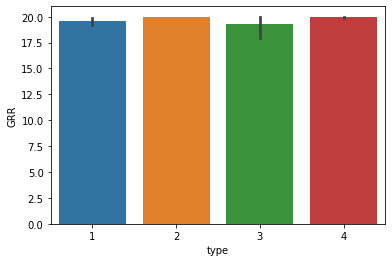

In [166]:
ax = sns.barplot(x="type", y="GRR", data=df_merged)

In [20]:
import numpy as np

In [167]:
df_merged["class"] = pd.cut(
    x=df_merged["GRR"],
    bins=[1, 18, np.inf], ## change P19 to core
    labels=["dispensable", "core"],
)

In [168]:
df_merged.tail()

,ID_x,type,ID_y,GRR,newID,class
146,7HG0603720,1,HORVU_MOREXr2_7HG0603720.1,20,7HG0603720,core
147,7HG0620900,1,HORVU_MOREXr2_7HG0620900.1,20,7HG0620900,core
148,7HG0622320,1,HORVU_MOREXr2_7HG0622320.1,20,7HG0622320,core
149,UnG0625210,1,HORVU_MOREXr2_UnG0625210.1,20,UnG0625210,core
150,UnG0628970,1,HORVU_MOREXr2_UnG0628970.1,12,UnG0628970,dispensable


In [169]:
for i in range(1,5):
    print(i)
    print(df_merged[df_merged.type == i].groupby("class").size())

1
class
dispensable     6
core           88
dtype: int64
2
class
dispensable    0
core           6
dtype: int64
3
class
dispensable     1
core           12
dtype: int64
4
class
dispensable     0
core           38
dtype: int64


In [170]:
data1 = df_merged[df_merged.type == 1].groupby("class").size()

In [171]:
data1

class
dispensable     6
core           88
dtype: int64

In [172]:
data1.values

array([ 6, 88])

In [173]:
data1.index.to_list()

['dispensable', 'core']

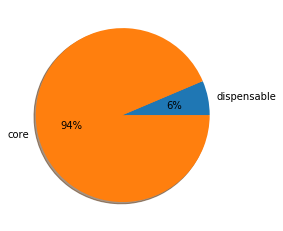

In [174]:
# plotting data on chart
plt.pie(data1, labels=data1.index.to_list(), autopct='%.0f%%', shadow=True)
  
# displaying chart
plt.show()

In [175]:
radiuses=df_merged.groupby("type").size().values/94

In [176]:
radiuses

array([1.        , 0.06382979, 0.13829787, 0.40425532])

In [178]:
radiuses[1]

0.06382978723404255

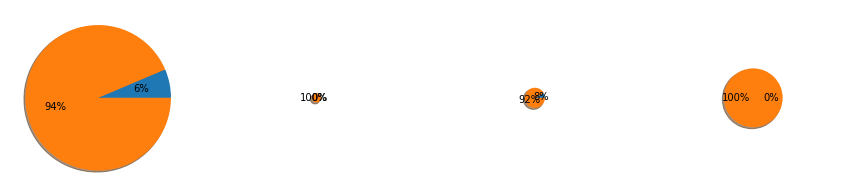

In [179]:
fig,axs = plt.subplots(1,4,figsize=(15,5))

# axs[0].pie(df_merged[df_merged.type == 1].groupby("class").size(), autopct='%.0f%%', shadow=True)
# axs[1].pie(df_merged[df_merged.type == 2].groupby("class").size(), autopct='%.0f%%', shadow=True)
# axs[2].pie(df_merged[df_merged.type == 3].groupby("class").size(), autopct='%.0f%%', shadow=True)
# axs[3].pie(df_merged[df_merged.type == 4].groupby("class").size(), autopct='%.0f%%', shadow=True)

for i in range(0,4):
    data = df_merged[df_merged.type == i+1].groupby("class").size()
    axs[i].pie(data, autopct='%.0f%%', shadow=True, radius=radiuses[i])

plt.show()

In [180]:
data1 = df_merged[df_merged.type == 1].groupby("class").size() #dispersed
data2 = df_merged[df_merged.type == 2].groupby("class").size() #proximal
data3 = df_merged[df_merged.type == 3].groupby("class").size() #tandem
data4 = df_merged[df_merged.type == 4].groupby("class").size() #WGD

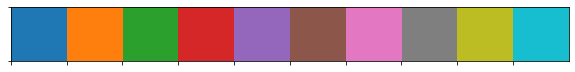

In [181]:
sns.palplot(sns.color_palette("tab10"))

In [182]:
colors = sns.color_palette("tab10")[0:2]

In [183]:
texts

[Text(1.0264986709644266, 0.3953485531885325, ''),
 Text(-1.026498652456824, -0.3953486012424027, '')]

In [184]:
data2

class
dispensable    0
core           6
dtype: int64

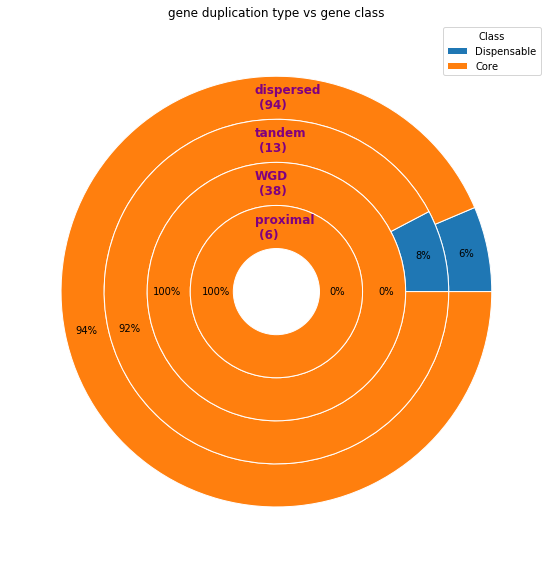

In [185]:
fig, ax = plt.subplots(figsize=(8,8))

size = 0.2

pie1 = ax.pie(data1, radius=1, autopct='%.0f%%', wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.9, colors=colors)

ax.pie(data3, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.88, autopct='%.0f%%', colors=colors)

ax.pie(data4, radius=1-size*2, wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.85, autopct='%.0f%%', colors=colors)

ax.pie(data2, radius=1-size*3, wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.7, autopct='%.0f%%', colors=colors)

# ax.legend(wedges, data1.index.to_list(),
#           title="gene class",
#           loc="center right",
#           bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='gene duplication type vs gene class')
plt.legend(pie1[0],["Dispensable","Core"],
          title="Class",
          loc="upper right")
plt.text(-0.1, 0.85, 'dispersed\n (94)', fontsize = 12, color="purple", weight="bold")
plt.text(-0.1, 0.65, 'tandem\n (13)', fontsize = 12, color="purple", weight="bold")
plt.text(-0.1, 0.45, 'WGD\n (38)', fontsize = 12, color="purple", weight="bold")
plt.text(-0.1, 0.25, 'proximal\n (6)', fontsize = 12, color="purple", weight="bold")

plt.tight_layout()
plt.show()

## merged tandem and proximal

In [186]:
data11 = df_merged[df_merged.type == 1].groupby("class").size() #dispersed
data22 = df_merged[(df_merged.type == 2) | (df_merged.type == 3)].groupby("class").size() #tandem & proximal
data33 = df_merged[df_merged.type == 4].groupby("class").size() #WGD

In [187]:
data22

class
dispensable     1
core           18
dtype: int64

In [188]:
data33

class
dispensable     0
core           38
dtype: int64

In [189]:
data11

class
dispensable     6
core           88
dtype: int64

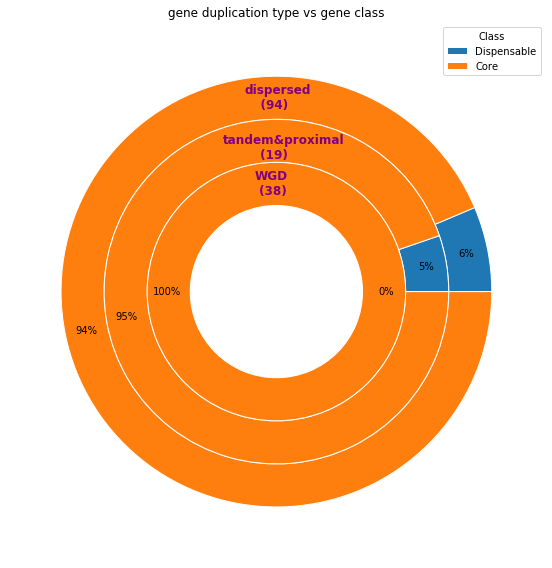

In [193]:
fig, ax = plt.subplots(figsize=(8,8))

size = 0.2

pie1 = ax.pie(data11, radius=1, autopct='%.0f%%', wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.9, colors=colors)

ax.pie(data22, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.88, autopct='%.0f%%', colors=colors)

ax.pie(data33, radius=1-size*2, wedgeprops=dict(width=size, edgecolor='w'),
       pctdistance=0.85, autopct='%.0f%%', colors=colors)

# ax.legend(wedges, data1.index.to_list(),
#           title="gene class",
#           loc="center right",
#           bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='gene duplication type vs gene class')
plt.legend(pie1[0],["Dispensable","Core"],
          title="Class",
          loc="upper right")
plt.text(-0.15, 0.85, 'dispersed\n    (94)', fontsize = 12, color="purple", weight="bold")
plt.text(-0.25, 0.62, 'tandem&proximal\n         (19)', fontsize = 12, color="purple", weight="bold")
plt.text(-0.1, 0.45, 'WGD\n (38)', fontsize = 12, color="purple", weight="bold")

plt.tight_layout()
plt.show()

In [194]:
fig.savefig("gene_type_coreP19_dispensable_.png",dpi=300)